In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score,  recall_score, f1_score

In [3]:
#Read the csv file
dataset = pd.read_csv('data/2_resampled_heart_attack_data.csv')
dataset

,Sex,Cholesterol,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Triglycerides,Activity per Week,Sleeping Hours,Country,Systolic,Diastolic,Age_HeartRate,Obesity_SedentaryHours,Continent_Hemisphere,Heart Attack Risk
0,0.737560,-0.666638,-1.234600,-0.877148,0.374114,-1.089518,-1.054288,-1.159330,-0.886066,-0.891675,...,-0.611617,-1.547930,-0.478523,-1.665291,0.905746,0.212995,0.413550,0.034740,1.950166,0
1,0.737560,1.658577,0.809979,1.140059,0.374114,0.917837,-1.477666,1.355402,1.128584,-0.891675,...,-0.847592,-1.093818,0.042727,-1.127707,1.181308,0.566926,-0.998033,-0.158409,1.035521,0
2,-1.355822,0.823555,0.809979,-0.877148,-2.672980,-1.089518,-1.430004,0.098036,1.128584,1.121485,...,0.781096,0.268519,-1.521022,-0.590124,1.535602,0.991644,-1.276675,0.879151,0.120877,0
3,0.737560,1.581498,0.809979,1.140059,0.374114,0.917837,-0.036729,-1.159330,1.128584,-0.891675,...,-0.185937,-0.185593,-1.521022,-1.127707,1.102576,1.062430,1.081067,0.341262,1.035521,0
4,0.737560,0.746476,0.809979,1.140059,0.374114,-1.089518,-0.760144,1.355402,1.128584,-0.891675,...,-0.866100,-1.093818,-0.999772,1.201820,-1.731774,0.212995,1.084129,-1.180752,-0.793768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,0.737560,-0.743717,-1.234600,-0.877148,0.374114,-1.089518,-1.448617,0.098036,-0.886066,-0.891675,...,1.433496,-1.093818,-1.521022,-0.590124,1.653700,0.142208,-0.287648,-0.415661,0.120877,1
11244,-1.355822,-1.244730,-1.234600,-0.877148,0.374114,-1.089518,-0.454072,0.098036,-0.886066,-0.891675,...,-0.033248,-0.185593,0.042727,1.560208,0.787648,-1.273518,2.208394,-0.726568,-1.251091,1
11245,-1.355822,0.913481,0.809979,-0.877148,-2.672980,0.917837,0.068022,0.098036,-0.886066,1.121485,...,-0.445047,1.630856,-0.478523,0.126653,-0.393331,0.000636,-0.768893,-0.577697,-1.708413,1
11246,-1.355822,-0.268397,-1.234600,-0.877148,-2.672980,-1.089518,-0.881075,-1.159330,-0.886066,-0.891675,...,-0.611617,-0.185593,-1.521022,-0.769319,-1.298748,0.708499,-1.251669,1.307499,-0.793768,1


In [4]:
# Separate the features and the target variable
X = dataset.drop('Heart Attack Risk', axis=1)
y = dataset['Heart Attack Risk']

In [5]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Model Development

In [7]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [8]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, min_sam

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [13]:
# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [14]:
# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_

In [11]:
# Predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [18]:
# Evaluation
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1120
           1       0.71      0.58      0.64      1130

    accuracy                           0.67      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.68      0.67      0.67      2250

Accuracy Score: 0.6711111111111111
ROC-AUC Score: 0.7147961441213654
Precision Score: 0.711038961038961
Recall Score: 0.5814159292035398
F1 Score: 0.6397273612463485


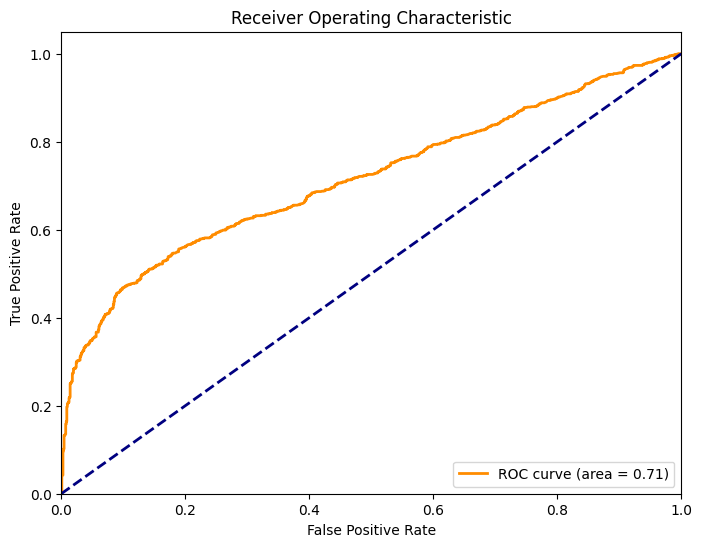

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Upon utilizing the recall score and precision score:

1. Recall (Sensitivity): This score shows that out of all the actual heart attack cases, how many were correctly predicted by the model. With a recall score of 0.5814159292035398 (approximately 58.14%), it means that the model correctly identifies 58.14% of all true heart attack risk cases.

2. Precision: This score shows that out of all the instances predicted to be at risk for a heart attack, how many were actually at risk. With a precision score of 0.711038961038961 (approximately 71.10%), it means that 71.10% of the predictions made by the model about being at risk were correct.

Combining these insights, we can say:

Out of all the cases that our model predicts as having a heart attack risk, approximately 71.10% are indeed at heart attack risk according to our data. Moreover, the model is capable of identifying about 58.14% of all true heart attack risk cases. This indicates that while the model has a moderate level of precision, it is somewhat conservative in predicting heart attack risk, as there is a number of at-risk cases that it does not catch (a recall of 58.14%). The ROC-AUC value of 0.7147961441213654 demonstrates that the model has a reasonable ability to discriminate between the at-risk and not-at-risk cases compared to random chance, but there's room for improvement in its predictive accuracy.